In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow import expand_dims

In [3]:

!pip install -U -q PyDrive
  
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
  
  
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [62]:

link = 'https://drive.google.com/file/d/1lhyDmvDMDC6Yp4rmnUJFpuWi7-QzZ8_B/view?usp=sharing'
  
import pandas as pd
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('icml_face_data.csv')  
  
df = pd.read_csv('icml_face_data.csv')
print(df)

       emotion        Usage                                             pixels
0            0     Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0     Training  151 150 147 155 148 133 111 140 170 174 182 15...
2            2     Training  231 212 156 164 174 138 161 173 182 200 106 38...
3            4     Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4            6     Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...        ...          ...                                                ...
35882        6  PrivateTest  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883        3  PrivateTest  178 174 172 173 181 188 191 194 196 199 200 20...
35884        0  PrivateTest  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885        3  PrivateTest  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886        2  PrivateTest  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...

[35887 rows x 3 columns]


In [64]:
df.shape

(35887, 3)

In [65]:
len(df.drop_duplicates())

34653

In [66]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [67]:
len(df)

34653

In [68]:
df.columns=['emotion', 'usage', 'pixels']

In [69]:
for i in range(len(df.pixels)):

  test_str = df.pixels[i]
  test_list = test_str.split(' ')
  df.pixels[i] = np.asarray(test_list).reshape(48,48).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [70]:
type(df.pixels[0])

numpy.ndarray

In [94]:
df.pixels[0]

(48, 48)

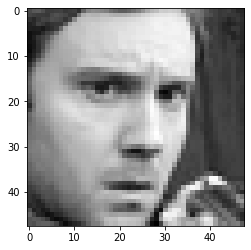

In [72]:
plt.imshow(df.pixels[0], cmap='gray')


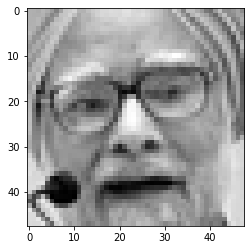

In [73]:
plt.imshow(df.pixels[1], cmap='gray')

In [74]:
df.head()

,emotion,usage,pixels
0,0,Training,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63..."
1,0,Training,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11..."
2,2,Training,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16..."
3,4,Training,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20..."
4,6,Training,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [75]:
df_train = df[df['usage']=='Training']

In [76]:
df_test = df[df['usage']=='PublicTest']

In [77]:
df_test = df_test.append(df[df['usage']=='PrivateTest'], ignore_index = True)

In [78]:
df_test.shape

(7138, 3)

In [79]:
len(df[df['usage']=='PublicTest']) + len(df[df['usage']=='PrivateTest'])

7138

In [80]:
df_train.drop(columns = 'usage', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [81]:
df_train.head()

,emotion,pixels
0,0,"[[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63..."
1,0,"[[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11..."
2,2,"[[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16..."
3,4,"[[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20..."
4,6,"[[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [82]:
df_test.drop(columns = 'usage', inplace = True)

In [83]:
df_test.head()

,emotion,pixels
0,0,"[[254.0, 254.0, 254.0, 254.0, 254.0, 249.0, 25..."
1,1,"[[156.0, 184.0, 198.0, 202.0, 204.0, 207.0, 21..."
2,4,"[[69.0, 118.0, 61.0, 60.0, 96.0, 121.0, 103.0,..."
3,6,"[[205.0, 203.0, 236.0, 157.0, 83.0, 158.0, 120..."
4,3,"[[87.0, 79.0, 74.0, 66.0, 74.0, 96.0, 77.0, 80..."


In [84]:
X_train = df_train.pixels
y_train = df_train.emotion
X_test = df_test.pixels
y_test = df_test.emotion

In [85]:
type(X_train)

pandas.core.series.Series

In [86]:
X_train.head()

0    [[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...
1    [[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 11...
2    [[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 16...
3    [[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...
4    [[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: pixels, dtype: object

In [96]:
x = X_train / 255.

In [97]:
x.shape

(27515,)

In [89]:
X_train.shape

(27515,)

In [90]:
X_test.shape

(7138,)

In [91]:
model = Sequential()
model.add(Rescaling(1./255, input_shape=(48,48,1)))

#reg_l1 = regularizers.L1(0.01)
#reg_l2 = regularizers.L2(0.01)
#reg_l1_l2 = regularizers.l1_l2(l1=0.005, l2=0.0005)

model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same',activation='relu'))
model.add(layers.MaxPooling2D(3))


model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same',activation="relu"))
model.add(layers.MaxPooling2D(3))
# model.add(Dropout(0.2))

model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same',activation="relu"))
model.add(layers.MaxPooling2D(2))
# model.add(Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(Dropout(0.5))

model.add(layers.Dense(7, activation='softmax'))
    
opt = optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy']) 

In [93]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1, restore_best_weights=True)

history = model.fit(X_train[1], y_train[1],
         batch_size=32, 
         epochs=100, 
         validation_split=0.3,
         callbacks=[es])

ValueError: ignored

In [14]:
type(X_train)

NameError: ignored

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)

model.trainable = False

flatten_layer = layers.Flatten()
dense_layer = layers.Dense(500, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')
    
    
model = models.Sequential([
        model,
        flatten_layer,
        dense_layer,
        prediction_layer])

opt = optimizers.Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

X_train = preprocess_input(X_train) 
X_test = preprocess_input(X_test)

In [ ]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)